<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/08_FunctionalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease classification

### Importing Libraries

In [23]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Understanding the dataset

Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

Columns:
    - age: age in years
    - sex: (1 = male; 0 = female)
    - cp: chest pain type
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    - chol: serum cholestoral in mg/dl
    - fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    - restecg: resting electrocardiographic results
    - thalach: maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [24]:
df = pd.read_csv("/content/sample_data/heart.csv")

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0


In [5]:
df.shape

(303, 14)

In [25]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [27]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [28]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

### Data VIsualization

#### 1) Sex

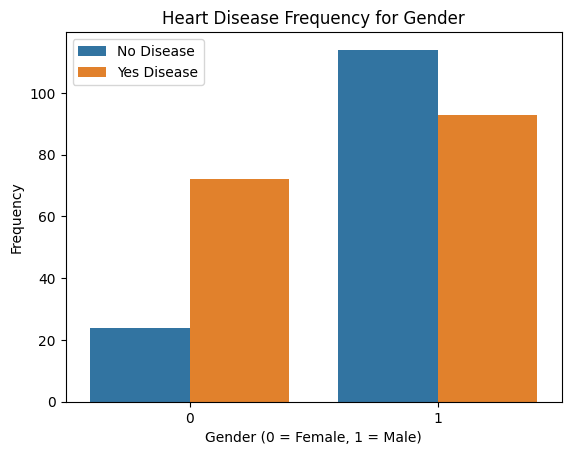

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', hue='target', data=df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(["No Disease", "Yes Disease"])
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()


#### 2) Age

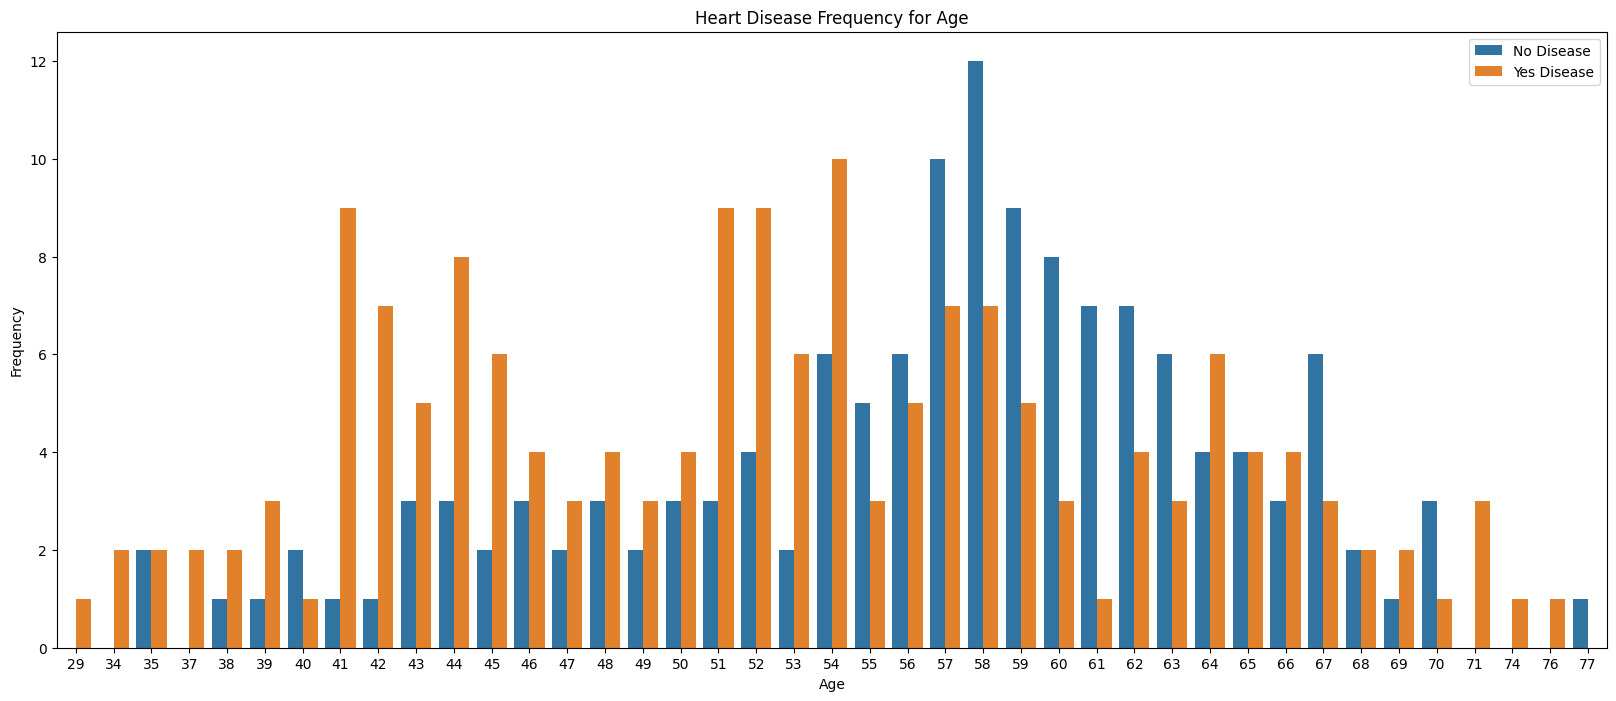

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.countplot(x='age', hue='target', data=df)

plt.title('Heart Disease Frequency for Age')
plt.legend(["No Disease", "Yes Disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


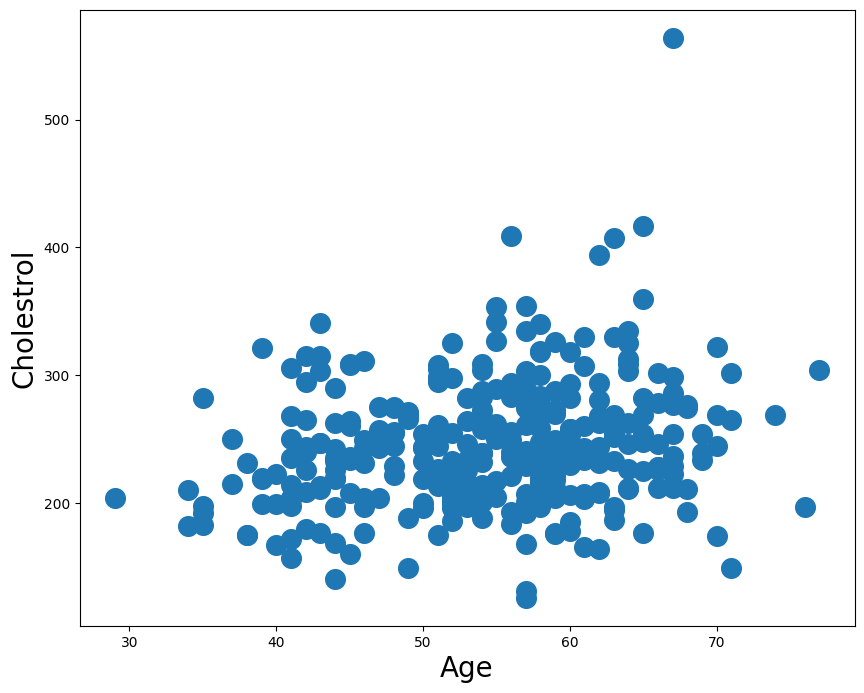

In [32]:
plt.figure(figsize = (10, 8))

plt.scatter(df['age'], df['chol'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)
plt.show()

### Splitting the data

In [33]:
features = df.drop('target', axis=1)

target = df[['target']]

In [34]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3


In [35]:
target.sample(10)

,target
239,0
3,1
23,1
107,1
126,1
61,1
101,1
187,0
288,0
2,1


In [36]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [37]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [38]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [39]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


### Splitting dataset into training and testing data

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=1)

In [41]:
x_train.shape, y_train.shape

((242, 13), (242, 1))

In [42]:
x_test.shape, y_test.shape

((61, 13), (61, 1))

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.15,
                                                  random_state=10)

In [44]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [45]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

### Building the model

In [46]:
def build_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [47]:
model = build_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 12)                168       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


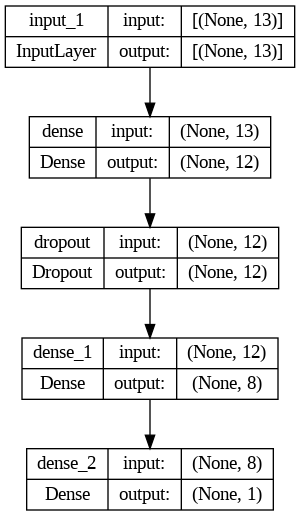

In [48]:
keras.utils.plot_model(model, show_shapes=True)

In [49]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [56]:
num_epochs = 100

In [57]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [58]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 12)                168       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
13/13 [==========

### Plotting accuracy

In [63]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2'])

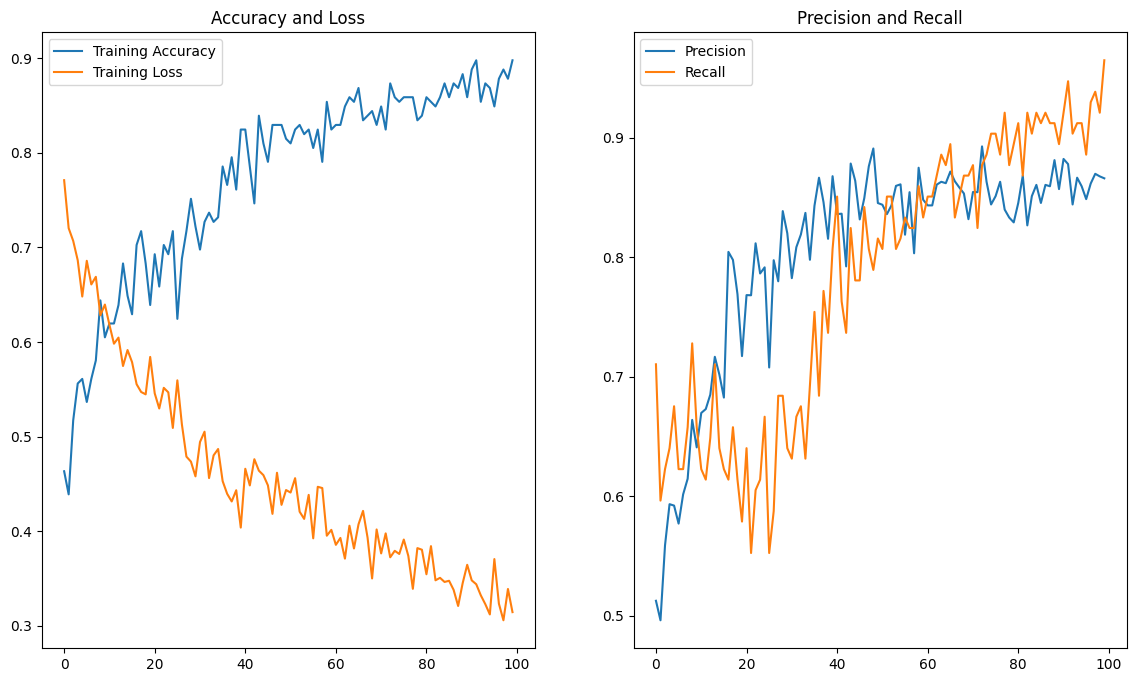

In [65]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_2']
recall = training_history.history['recall_2']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

### Model evaluation

In [76]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

2/2 [==============================] - 0s 10ms/step - loss: 0.5216 - accuracy: 0.7377 - precision_2: 0.7143 - recall_2: 0.8065


loss           0.521590
accuracy       0.737705
precision_2    0.714286
recall_2       0.806452
dtype: float64

### Prediction

In [67]:
y_pred = model.predict(x_test)

y_pred[:10]

2/2 [==============================] - 0s 5ms/step


array([[0.00226613],
       [0.8243197 ],
       [0.07445957],
       [0.00808073],
       [0.02511149],
       [0.00481416],
       [0.0039653 ],
       [0.58520293],
       [0.00338284],
       [0.9486927 ]], dtype=float32)

In [68]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [69]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [70]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [71]:
pred_results.sample(10)

,y_test,y_pred
15,0,1
2,0,0
18,1,1
23,1,1
39,1,0
9,1,1
28,1,1
27,1,1
41,0,0
3,0,0


In [72]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,20,6
1,10,25


In [73]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [74]:
precision_score(y_test, y_pred)

0.7142857142857143

In [75]:
recall_score(y_test, y_pred)

0.8064516129032258